In [1]:
# gen_model_name = 'OracleInpainter'
# gen_model_name = 'LocalMeanInpainter'
# gen_model_name = 'RandomGreyscaleBernoulliInpainter'
gen_model_name = 'BlurryInpainter'  # broken
reg_coef = 1e-2
save_dir = './imgs'
classifier = 'neuralnet'
#classifier = 'logisticregression'  # LR isn't fully supported; has bugs with OracleInpainter
num_imgs = 1
epochs = 100
batch_size = 16
lr = 0.05
importance_method = 'vbd_sdr'
# importance_method = 'vbd_ssr'
# importance_method = 'bbmp_sdr'
num_samples = 1

import shutil, os
clean_slate = True  # danger; save_dir better not be something important like './'
if clean_slate and os.path.exists(os.path.join(save_dir, gen_model_name)):
    shutil.rmtree(os.path.join(save_dir, gen_model_name))


%run synthetic.py --classifier $classifier --importance-method $importance_method --dropout_param_size 28 28 --epochs $epochs --lr $lr --reg-coef $reg_coef --batch-size $batch_size --num-samples $num_samples --gen-model-name $gen_model_name --save-dir $save_dir --num-imgs $num_imgs --dataset valid/ --gpu-ids 0 --num-examples 6000 --overwrite --no-cuda

args: Namespace(ard_init=0.0, batch_size=16, bvlc_dir='nets/BVLC/', classifier='neuralnet', cuda=False, dataset='valid/', dropout_param_size=[28, 28], epoch_print=1, epochs=100, eval_samples=1, gan_g_dir='nets/GAN/', gen_model_name='BlurryInpainter', gen_model_path=None, gpu_ids=[0], image_offset=0, importance_method='vbd_sdr', lr=0.05, no_cuda=True, num_examples=6000, num_imgs=1, num_samples=1, overwrite=True, prior=0.5, reg_coef=0.01, rw_max=30, save_dir='./imgs', save_tag='', seed=1, tv_coef=0.0, verbose=1, visdom_enabled=False, visualize=False, window=1)
==================== Start =====================

done training neural net
img_idx: 0
Start evaluating image...
epoch 0 / 100: loss 5.58785 (5.58785, 0.00000), acc 1.00, range: (-0.05, -0.01, 0.05), takes 0.02s,  
epoch 1 / 100: loss 5.83248 (5.70265, 0.12983), acc 1.00, range: (-0.10, -0.02, 0.10), takes 0.02s,  
epoch 2 / 100: loss 5.38696 (5.12887, 0.25809), acc 1.00, range: (-0.15, -0.04, 0.15), takes 0.00s,  
epoch 3 / 100: lo

15 15


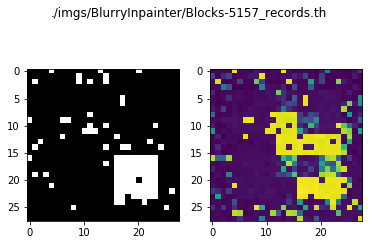

In [2]:
import torch
import torchvision
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import glob
filenames = glob.glob('./imgs/{}/*'.format(gen_model_name))
assert len(filenames) > 0, 'no files'
for filename in filenames:
    z = torch.load(filename)

    yhat = int(torch.max(z['classifier_output'], 1)[1].numpy())
    y = z['gnd_truth_label']
    print(y, yhat)


    f, a = plt.subplots(1, 2)
    a[0].imshow(z['unnormalized_img'].permute(1, 2, 0).numpy())
    a[1].imshow(z['imp_vector'])
    f.suptitle(filename)

